## Introduction

Dispersion interaction is very important for molecular system. Here we combine FIREBALL with the DFT-D3 by Stefan Grimme's group.

See more:
* https://www.chemiebn.uni-bonn.de/pctc/mulliken-center/software/dft-d3/get-the-current-version-of-dft-d3


Install DFT-D3 simply by :
```
conda install -c psi4 dftd3
```

or compile yourself by following the website above.

In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
from thunder_ase.fireball import Fireball
import numpy as np
import ase
from ase.build import molecule
from ase.calculators.dftd3 import DFTD3

In [ ]:
# Construct Benzene dimer Structure
benzene = molecule('C6H6')
benzene.positions += np.array([0, 0, 3.4])
dimer = benzene + molecule('C6H6')

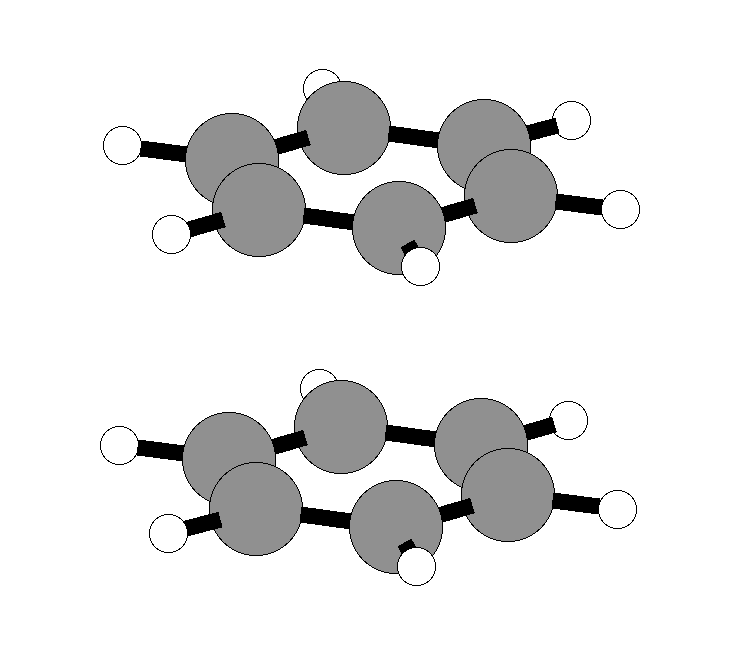

In [ ]:
# set Fdata dir
Fdata_path = '/home/ren/Fdata/Fdata-Horsfield-0.10-9SN.Hs4.10-9DN.Cs4.35p4.80.Ns3.95p4.40.Os3.35p3.80/'

In [ ]:
kwargs = {'iwriteout_charges': 0,  # don't Writing out the charges.
          'efermi_T': 200.0,
          }

In [ ]:
fireball = Fireball(command='fireball-ase.9.x', 
                Fdata_path=Fdata_path,
                **kwargs)

calc = DFTD3(xc='pbe', dft=fireball)

In [ ]:
dimer.calc = calc
benzene.calc = calc

In [ ]:
etot_dimer = dimer.get_potential_energy()

In [ ]:
e_fireball_dimer = dimer.calc.dft.get_potential_energy()

In [ ]:
etot_benzene = benzene.get_potential_energy()

In [ ]:
e_fireball_benzene = benzene.calc.dft.get_potential_energy()

In [ ]:
print("The interaction between benzene is {:.3f} eV".format(etot_dimer - 2*etot_benzene))

In [ ]:
print("The interaction without D3 is {:.3f} eV".format(e_fireball_dimer - 2*e_fireball_benzene))